In [1]:
from config import *


In [2]:
print(f"{year}-{month:02}")

2020-09


In [3]:
import pandas as pd
import sys
sys.path.append('../../py')
import db
import weighted
import inspect
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Microsoft YaHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
%matplotlib inline

import seaborn as sns
import scipy.stats as stats
import numpy as np
import math


In [4]:
from matplotlib.font_manager import _rebuild

_rebuild() #reload一下

In [5]:
#from map_wrapper import *
#from mpl_toolkits.basemap import Basemap

In [6]:
conn=db.get_conn()

In [7]:

cities = """
('北京','上海','深圳','杭州','广州','南京','苏州','成都','东莞','西安','武汉','天津','长沙',
'宁波','福州','大连','重庆','青岛','济南','合肥','长春','昆明','郑州','沈阳','哈尔滨','厦门')
"""
data_original=pd.read_sql(sql=f"select * from jobs where year_month={year}{month:02} and monthly_salary>0 and monthly_salary<80000 and city in {cities}", con=conn)


In [8]:
error_job_ids=['104660258','104142922','108434795','101357291','106253516','110368302','111391233','108665401','109277048'
                  ,'73857191','108584955','102824950','102824949','111391233','110884556']
data=data_original[~data_original.job_id.isin(error_job_ids)]

In [9]:
del data['publish_date']
del data['published_on_weekend']
del data['title']
del data['job_description']
del data['job_id']

In [10]:
#Common Functions
def get_sub_stats_by_col(data, col):
    categories=data[col].unique()
    salary_mean=[]
    salary_95_min=[]
    salary_95_max=[]
    salary_median=[]

    count=[]
    
    categorys_out=[]
    for category in categories:
        #print(feature)
        idata=data[data[col]==category]
        headcount=idata.headcount.sum()
        values = idata.monthly_salary.values
        weights = idata.headcount.values
        #print(str(headcount))
        if headcount==0:
            continue
        
        salary_mean.append(np.average(values, weights=weights))
        

        q = weighted.weighted_quantile(values,[0.025,0.5,0.975],weights)
        salary_95_min.append(q[0])
        salary_median.append(q[1])
        salary_95_max.append(q[2])
        count.append(idata.headcount.sum())
        categorys_out.append(category)
    sub_data=pd.DataFrame()
    sub_data[col]=[c for c in categorys_out]
    sub_data['平均工资']=salary_mean
    sub_data['最低工资']=salary_95_min
    sub_data['中位数']=salary_median
    sub_data['最高工资']=salary_95_max
    sub_data['招聘人数']=count
    sub_data['百分比']=count/np.sum(count)
    sub_data=sub_data.sort_values(by='平均工资', ascending=False)

    return sub_data

data_format={"百分比":"{:.2%}","平均工资":"{:.0f}","中位数":"{:.0f}","最低工资":"{:.0f}","最高工资":"{:.0f}"}

translate_dict={}


# 程序员工资

In [11]:
data_city=get_sub_stats_by_col(data,'city')
data_city['排名']=list(range(1,data_city.shape[0]+1))
data_city=data_city[['排名', 'city', '平均工资', '最低工资', '中位数', '最高工资', '招聘人数', '百分比']]
data_city.style.format(data_format)

,排名,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
13,1,北京,19346,7000,17500,45000,28398,8.88%
0,2,上海,17722,7000,16500,40000,56452,17.64%
2,3,深圳,16856,6500,15000,37500,52323,16.35%
5,4,杭州,15952,6000,14500,37500,18722,5.85%
11,5,广州,14127,5500,12500,30000,34307,10.72%
1,6,南京,13667,5250,12500,27273,17223,5.38%
14,7,东莞,13613,5250,12500,24101,4027,1.26%
8,8,苏州,12892,5500,12500,27500,9533,2.98%
3,9,成都,12527,3750,11500,30000,17277,5.40%
20,10,厦门,12471,4000,12500,22500,2247,0.70%


In [12]:
def describe(data_city, career):
    for index, row in data_city.iterrows():
        print(f"{year}年{month}月{row['city']}招收{career}{row['招聘人数']}人。2019年{month}月{row['city']}{career}平均工资{row['平均工资']:.0f}元，工资中位数{row['中位数']:.0f}元，其中95%的人的工资介于{row['最低工资']:.0f}元到{row['最高工资']:.0f}元。\r\n")

In [13]:
career='软件工程师'
for index, row in data_city.iterrows():
    print(f"{year}年{month}月{row['city']}招收{career}{row['招聘人数']}人。2019年{month}月{row['city']}{career}平均工资{row['平均工资']:.0f}元，工资中位数{row['中位数']:.0f}元，其中95%的人的工资介于{row['最低工资']:.0f}元到{row['最高工资']:.0f}元。\r\n")

2020年9月北京招收软件工程师28398人。2019年9月北京软件工程师平均工资19346元，工资中位数17500元，其中95%的人的工资介于7000元到45000元。

2020年9月上海招收软件工程师56452人。2019年9月上海软件工程师平均工资17722元，工资中位数16500元，其中95%的人的工资介于7000元到40000元。

2020年9月深圳招收软件工程师52323人。2019年9月深圳软件工程师平均工资16856元，工资中位数15000元，其中95%的人的工资介于6500元到37500元。

2020年9月杭州招收软件工程师18722人。2019年9月杭州软件工程师平均工资15952元，工资中位数14500元，其中95%的人的工资介于6000元到37500元。

2020年9月广州招收软件工程师34307人。2019年9月广州软件工程师平均工资14127元，工资中位数12500元，其中95%的人的工资介于5500元到30000元。

2020年9月南京招收软件工程师17223人。2019年9月南京软件工程师平均工资13667元，工资中位数12500元，其中95%的人的工资介于5250元到27273元。

2020年9月东莞招收软件工程师4027人。2019年9月东莞软件工程师平均工资13613元，工资中位数12500元，其中95%的人的工资介于5250元到24101元。

2020年9月苏州招收软件工程师9533人。2019年9月苏州软件工程师平均工资12892元，工资中位数12500元，其中95%的人的工资介于5500元到27500元。

2020年9月成都招收软件工程师17277人。2019年9月成都软件工程师平均工资12527元，工资中位数11500元，其中95%的人的工资介于3750元到30000元。

2020年9月厦门招收软件工程师2247人。2019年9月厦门软件工程师平均工资12471元，工资中位数12500元，其中95%的人的工资介于4000元到22500元。

2020年9月武汉招收软件工程师18255人。2019年9月武汉软件工程师平均工资12068元，工资中位数11500元，其中95%的人的工资介于5250元到25000元。

2020年9月长沙招收软件工程师7987人。2019年9月长沙软件工程师平均工资12052元

In [14]:
describe(data_city,'软件工程师')

2020年9月北京招收软件工程师28398人。2019年9月北京软件工程师平均工资19346元，工资中位数17500元，其中95%的人的工资介于7000元到45000元。

2020年9月上海招收软件工程师56452人。2019年9月上海软件工程师平均工资17722元，工资中位数16500元，其中95%的人的工资介于7000元到40000元。

2020年9月深圳招收软件工程师52323人。2019年9月深圳软件工程师平均工资16856元，工资中位数15000元，其中95%的人的工资介于6500元到37500元。

2020年9月杭州招收软件工程师18722人。2019年9月杭州软件工程师平均工资15952元，工资中位数14500元，其中95%的人的工资介于6000元到37500元。

2020年9月广州招收软件工程师34307人。2019年9月广州软件工程师平均工资14127元，工资中位数12500元，其中95%的人的工资介于5500元到30000元。

2020年9月南京招收软件工程师17223人。2019年9月南京软件工程师平均工资13667元，工资中位数12500元，其中95%的人的工资介于5250元到27273元。

2020年9月东莞招收软件工程师4027人。2019年9月东莞软件工程师平均工资13613元，工资中位数12500元，其中95%的人的工资介于5250元到24101元。

2020年9月苏州招收软件工程师9533人。2019年9月苏州软件工程师平均工资12892元，工资中位数12500元，其中95%的人的工资介于5500元到27500元。

2020年9月成都招收软件工程师17277人。2019年9月成都软件工程师平均工资12527元，工资中位数11500元，其中95%的人的工资介于3750元到30000元。

2020年9月厦门招收软件工程师2247人。2019年9月厦门软件工程师平均工资12471元，工资中位数12500元，其中95%的人的工资介于4000元到22500元。

2020年9月武汉招收软件工程师18255人。2019年9月武汉软件工程师平均工资12068元，工资中位数11500元，其中95%的人的工资介于5250元到25000元。

2020年9月长沙招收软件工程师7987人。2019年9月长沙软件工程师平均工资12052元

In [15]:
#draw_city_map(data_city,2000,f'{year}年{month}月中国大陆主要城市程序员工资')

# 区块链工程师

In [16]:
data_blockchain=get_sub_stats_by_col(data[(data['career']=='区块链开发')],'city')

data_blockchain.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
8,大连,30000,30000,30000,30000,1,0.13%
9,北京,23472,12500,25000,35000,54,7.15%
21,苏州,22500,22500,22500,22500,10,1.32%
12,昆明,21400,7000,19000,31000,5,0.66%
11,东莞,20714,18000,20714,27500,7,0.93%
4,上海,20583,8850,20222,35500,128,16.95%
2,杭州,20561,11094,21500,47812,55,7.28%
3,深圳,20171,3750,21500,35416,140,18.54%
17,合肥,19167,17500,19167,22500,3,0.40%
16,南京,19125,10000,16000,47500,8,1.06%


In [17]:
describe(data_blockchain,'区块链工程师')

2020年9月大连招收区块链工程师1人。2019年9月大连区块链工程师平均工资30000元，工资中位数30000元，其中95%的人的工资介于30000元到30000元。

2020年9月北京招收区块链工程师54人。2019年9月北京区块链工程师平均工资23472元，工资中位数25000元，其中95%的人的工资介于12500元到35000元。

2020年9月苏州招收区块链工程师10人。2019年9月苏州区块链工程师平均工资22500元，工资中位数22500元，其中95%的人的工资介于22500元到22500元。

2020年9月昆明招收区块链工程师5人。2019年9月昆明区块链工程师平均工资21400元，工资中位数19000元，其中95%的人的工资介于7000元到31000元。

2020年9月东莞招收区块链工程师7人。2019年9月东莞区块链工程师平均工资20714元，工资中位数20714元，其中95%的人的工资介于18000元到27500元。

2020年9月上海招收区块链工程师128人。2019年9月上海区块链工程师平均工资20583元，工资中位数20222元，其中95%的人的工资介于8850元到35500元。

2020年9月杭州招收区块链工程师55人。2019年9月杭州区块链工程师平均工资20561元，工资中位数21500元，其中95%的人的工资介于11094元到47812元。

2020年9月深圳招收区块链工程师140人。2019年9月深圳区块链工程师平均工资20171元，工资中位数21500元，其中95%的人的工资介于3750元到35416元。

2020年9月合肥招收区块链工程师3人。2019年9月合肥区块链工程师平均工资19167元，工资中位数19167元，其中95%的人的工资介于17500元到22500元。

2020年9月南京招收区块链工程师8人。2019年9月南京区块链工程师平均工资19125元，工资中位数16000元，其中95%的人的工资介于10000元到47500元。

2020年9月宁波招收区块链工程师3人。2019年9月宁波区块链工程师平均工资18611元，工资中位数18611元，其中95%的人的工资介于17500元到20833元。

2020年9月长沙招收区块链工程师18人。2019年9月长沙区块链工程师平均工资18306元，工资中

In [18]:
#draw_city_map(data_blockchain[data_blockchain['招聘人数']>10],10,f'{year}年{month}月中国大陆主要城市区块链工程师工资')

# 机器学习工程师

In [19]:
data_city_algorithm=get_sub_stats_by_col(data[data.career=='机器学习'],'city')
data_city_algorithm.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
3,北京,30174,8367,30000,60000,182,15.41%
7,深圳,26564,7000,22500,56610,213,18.04%
0,上海,24658,7000,22500,59167,244,20.66%
13,厦门,22500,22500,22500,22500,5,0.42%
20,青岛,20500,12500,12500,45000,5,0.42%
17,南京,19725,7000,20000,67917,40,3.39%
22,大连,18000,17000,17000,20000,6,0.51%
5,杭州,16941,6675,17500,26500,34,2.88%
19,沈阳,16250,5000,13333,37500,4,0.34%
4,广州,15642,1750,12500,35000,100,8.47%


In [20]:
describe(data_city_algorithm,'机器学习')

2020年9月北京招收机器学习182人。2019年9月北京机器学习平均工资30174元，工资中位数30000元，其中95%的人的工资介于8367元到60000元。

2020年9月深圳招收机器学习213人。2019年9月深圳机器学习平均工资26564元，工资中位数22500元，其中95%的人的工资介于7000元到56610元。

2020年9月上海招收机器学习244人。2019年9月上海机器学习平均工资24658元，工资中位数22500元，其中95%的人的工资介于7000元到59167元。

2020年9月厦门招收机器学习5人。2019年9月厦门机器学习平均工资22500元，工资中位数22500元，其中95%的人的工资介于22500元到22500元。

2020年9月青岛招收机器学习5人。2019年9月青岛机器学习平均工资20500元，工资中位数12500元，其中95%的人的工资介于12500元到45000元。

2020年9月南京招收机器学习40人。2019年9月南京机器学习平均工资19725元，工资中位数20000元，其中95%的人的工资介于7000元到67917元。

2020年9月大连招收机器学习6人。2019年9月大连机器学习平均工资18000元，工资中位数17000元，其中95%的人的工资介于17000元到20000元。

2020年9月杭州招收机器学习34人。2019年9月杭州机器学习平均工资16941元，工资中位数17500元，其中95%的人的工资介于6675元到26500元。

2020年9月沈阳招收机器学习4人。2019年9月沈阳机器学习平均工资16250元，工资中位数13333元，其中95%的人的工资介于5000元到37500元。

2020年9月广州招收机器学习100人。2019年9月广州机器学习平均工资15642元，工资中位数12500元，其中95%的人的工资介于1750元到35000元。

2020年9月成都招收机器学习48人。2019年9月成都机器学习平均工资15561元，工资中位数17500元，其中95%的人的工资介于3750元到27357元。

2020年9月武汉招收机器学习54人。2019年9月武汉机器学习平均工资15484元，工资中位数16500元，其中95%的人的工资介于1950元到27167元。

2020年9月昆明招收机器

In [21]:
#draw_city_map(data_city_algorithm,100,f'{year}年{month}月中国大陆主要城市机器学习工资')

# 系统架构师

In [22]:
data_city_architect=get_sub_stats_by_col(data[data.career=='架构师'],'city')
data_city_architect.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
4,北京,32639,13883,30000,60000,913,14.73%
3,深圳,31048,12500,30000,55000,980,15.81%
2,上海,30855,11905,30000,55138,1301,20.99%
5,杭州,28973,12500,29166,45000,399,6.44%
8,广州,26830,12500,25000,46650,762,12.29%
13,苏州,23436,2656,20417,75000,90,1.45%
1,南京,23409,10416,22500,38062,255,4.11%
14,成都,23248,7000,22500,45857,256,4.13%
20,厦门,22205,10000,22500,27500,22,0.35%
23,天津,22000,12000,25000,33000,7,0.11%


In [23]:
describe(data_city_architect,'架构师')

2020年9月北京招收架构师913人。2019年9月北京架构师平均工资32639元，工资中位数30000元，其中95%的人的工资介于13883元到60000元。

2020年9月深圳招收架构师980人。2019年9月深圳架构师平均工资31048元，工资中位数30000元，其中95%的人的工资介于12500元到55000元。

2020年9月上海招收架构师1301人。2019年9月上海架构师平均工资30855元，工资中位数30000元，其中95%的人的工资介于11905元到55138元。

2020年9月杭州招收架构师399人。2019年9月杭州架构师平均工资28973元，工资中位数29166元，其中95%的人的工资介于12500元到45000元。

2020年9月广州招收架构师762人。2019年9月广州架构师平均工资26830元，工资中位数25000元，其中95%的人的工资介于12500元到46650元。

2020年9月苏州招收架构师90人。2019年9月苏州架构师平均工资23436元，工资中位数20417元，其中95%的人的工资介于2656元到75000元。

2020年9月南京招收架构师255人。2019年9月南京架构师平均工资23409元，工资中位数22500元，其中95%的人的工资介于10416元到38062元。

2020年9月成都招收架构师256人。2019年9月成都架构师平均工资23248元，工资中位数22500元，其中95%的人的工资介于7000元到45857元。

2020年9月厦门招收架构师22人。2019年9月厦门架构师平均工资22205元，工资中位数22500元，其中95%的人的工资介于10000元到27500元。

2020年9月天津招收架构师7人。2019年9月天津架构师平均工资22000元，工资中位数25000元，其中95%的人的工资介于12000元到33000元。

2020年9月武汉招收架构师278人。2019年9月武汉架构师平均工资21693元，工资中位数20000元，其中95%的人的工资介于12500元到45153元。

2020年9月济南招收架构师33人。2019年9月济南架构师平均工资21242元，工资中位数17500元，其中95%的人的工资介于9000元到40000元。

2020年9月东莞招收架构师26人。2019年

In [24]:
#draw_city_map(data_city_architect,40,f'{year}年{month}月中国大陆主要城市【架构师】工资')

# 生物信息工程师

In [25]:
data_bio=get_sub_stats_by_col(data[data.career=='生物信息'],'city')
data_bio.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
5,杭州,20833,20833,20833,20833,1,3.45%
6,广州,16667,14000,16667,30000,6,20.69%
2,宁波,16000,16000,16000,16000,1,3.45%
0,苏州,12500,12500,12500,12500,1,3.45%
3,长沙,12500,12500,12500,12500,3,10.34%
1,上海,11900,8000,11500,17500,10,34.48%
4,福州,6500,6500,6500,6500,2,6.90%
7,成都,6500,6500,6500,6500,5,17.24%


In [26]:
describe(data_bio,'生物信息工程师')

2020年9月杭州招收生物信息工程师1人。2019年9月杭州生物信息工程师平均工资20833元，工资中位数20833元，其中95%的人的工资介于20833元到20833元。

2020年9月广州招收生物信息工程师6人。2019年9月广州生物信息工程师平均工资16667元，工资中位数16667元，其中95%的人的工资介于14000元到30000元。

2020年9月宁波招收生物信息工程师1人。2019年9月宁波生物信息工程师平均工资16000元，工资中位数16000元，其中95%的人的工资介于16000元到16000元。

2020年9月苏州招收生物信息工程师1人。2019年9月苏州生物信息工程师平均工资12500元，工资中位数12500元，其中95%的人的工资介于12500元到12500元。

2020年9月长沙招收生物信息工程师3人。2019年9月长沙生物信息工程师平均工资12500元，工资中位数12500元，其中95%的人的工资介于12500元到12500元。

2020年9月上海招收生物信息工程师10人。2019年9月上海生物信息工程师平均工资11900元，工资中位数11500元，其中95%的人的工资介于8000元到17500元。

2020年9月福州招收生物信息工程师2人。2019年9月福州生物信息工程师平均工资6500元，工资中位数6500元，其中95%的人的工资介于6500元到6500元。

2020年9月成都招收生物信息工程师5人。2019年9月成都生物信息工程师平均工资6500元，工资中位数6500元，其中95%的人的工资介于6500元到6500元。



In [27]:
#draw_city_map(data_bio,2,f'{year}年{month}月中国大陆主要城市【生物信息工程师】工资')

# 爬虫工程师

In [28]:
data_spider=get_sub_stats_by_col(data[data.career=='爬虫开发工程师'],'city')
data_spider=data_spider[data_spider['招聘人数']>10]
data_spider.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
7,杭州,19711,10812,19405,27500,45,7.38%
8,北京,16485,5750,16667,35000,51,8.36%
13,南京,15895,8500,15000,32500,19,3.11%
1,广州,13362,6338,12500,20000,87,14.26%
6,上海,12769,4292,12500,27500,80,13.11%
0,深圳,11840,5750,10500,25000,187,30.66%
9,武汉,11608,7500,11500,19362,37,6.07%
12,苏州,10542,7000,9750,15000,12,1.97%
11,合肥,10477,6000,8483,20000,11,1.80%
2,长沙,10093,5750,10000,14893,35,5.74%


In [29]:
describe(data_spider, '爬虫开发工程师')

2020年9月杭州招收爬虫开发工程师45人。2019年9月杭州爬虫开发工程师平均工资19711元，工资中位数19405元，其中95%的人的工资介于10812元到27500元。

2020年9月北京招收爬虫开发工程师51人。2019年9月北京爬虫开发工程师平均工资16485元，工资中位数16667元，其中95%的人的工资介于5750元到35000元。

2020年9月南京招收爬虫开发工程师19人。2019年9月南京爬虫开发工程师平均工资15895元，工资中位数15000元，其中95%的人的工资介于8500元到32500元。

2020年9月广州招收爬虫开发工程师87人。2019年9月广州爬虫开发工程师平均工资13362元，工资中位数12500元，其中95%的人的工资介于6338元到20000元。

2020年9月上海招收爬虫开发工程师80人。2019年9月上海爬虫开发工程师平均工资12769元，工资中位数12500元，其中95%的人的工资介于4292元到27500元。

2020年9月深圳招收爬虫开发工程师187人。2019年9月深圳爬虫开发工程师平均工资11840元，工资中位数10500元，其中95%的人的工资介于5750元到25000元。

2020年9月武汉招收爬虫开发工程师37人。2019年9月武汉爬虫开发工程师平均工资11608元，工资中位数11500元，其中95%的人的工资介于7500元到19362元。

2020年9月苏州招收爬虫开发工程师12人。2019年9月苏州爬虫开发工程师平均工资10542元，工资中位数9750元，其中95%的人的工资介于7000元到15000元。

2020年9月合肥招收爬虫开发工程师11人。2019年9月合肥爬虫开发工程师平均工资10477元，工资中位数8483元，其中95%的人的工资介于6000元到20000元。

2020年9月长沙招收爬虫开发工程师35人。2019年9月长沙爬虫开发工程师平均工资10093元，工资中位数10000元，其中95%的人的工资介于5750元到14893元。

2020年9月成都招收爬虫开发工程师19人。2019年9月成都爬虫开发工程师平均工资9592元，工资中位数11500元，其中95%的人的工资介于1750元到19500元。



In [30]:
#draw_city_map(data_spider,5,f'{year}年{month}月中国大陆主要城市【爬虫工程师】工资')

# Java程序员

In [31]:
data_java=get_sub_stats_by_col(data[(data.pl_java==1)],'city')
data_java.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
11,北京,18996,7000,16500,45000,11930,9.75%
3,上海,17707,7000,16500,37500,20486,16.74%
1,深圳,17313,7000,16000,37500,18181,14.85%
9,杭州,16399,7000,15000,37500,7442,6.08%
10,广州,14653,6500,12500,30000,14504,11.85%
21,东莞,13893,6150,12500,22500,1098,0.90%
0,南京,13503,5250,12500,25000,7620,6.23%
16,厦门,13006,3750,12500,22500,947,0.77%
20,苏州,12543,5500,11500,25000,2786,2.28%
6,大连,12381,5000,11000,27500,2818,2.30%


In [32]:
describe(data_java, 'Java程序员')

2020年9月北京招收Java程序员11930人。2019年9月北京Java程序员平均工资18996元，工资中位数16500元，其中95%的人的工资介于7000元到45000元。

2020年9月上海招收Java程序员20486人。2019年9月上海Java程序员平均工资17707元，工资中位数16500元，其中95%的人的工资介于7000元到37500元。

2020年9月深圳招收Java程序员18181人。2019年9月深圳Java程序员平均工资17313元，工资中位数16000元，其中95%的人的工资介于7000元到37500元。

2020年9月杭州招收Java程序员7442人。2019年9月杭州Java程序员平均工资16399元，工资中位数15000元，其中95%的人的工资介于7000元到37500元。

2020年9月广州招收Java程序员14504人。2019年9月广州Java程序员平均工资14653元，工资中位数12500元，其中95%的人的工资介于6500元到30000元。

2020年9月东莞招收Java程序员1098人。2019年9月东莞Java程序员平均工资13893元，工资中位数12500元，其中95%的人的工资介于6150元到22500元。

2020年9月南京招收Java程序员7620人。2019年9月南京Java程序员平均工资13503元，工资中位数12500元，其中95%的人的工资介于5250元到25000元。

2020年9月厦门招收Java程序员947人。2019年9月厦门Java程序员平均工资13006元，工资中位数12500元，其中95%的人的工资介于3750元到22500元。

2020年9月苏州招收Java程序员2786人。2019年9月苏州Java程序员平均工资12543元，工资中位数11500元，其中95%的人的工资介于5500元到25000元。

2020年9月大连招收Java程序员2818人。2019年9月大连Java程序员平均工资12381元，工资中位数11000元，其中95%的人的工资介于5000元到27500元。

2020年9月长沙招收Java程序员3316人。2019年9月长沙Java程序员平均工资12054元，工资中位数11500元，其中95%的人的工资介于5750元到23160元。

2020年9月

In [33]:
#draw_city_map(data_java, 500, f'{year}年{month}月中国大陆主要城市【Java工程师】工资')

In [34]:
history_data = pd.read_sql(sql='select * from City_Stats', con=conn)

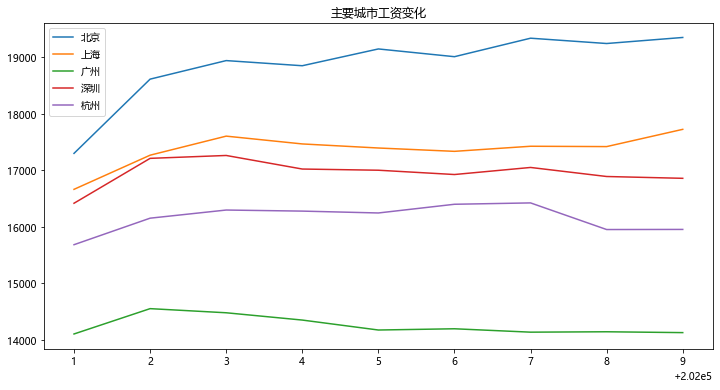

In [35]:
#plt.plot("Month","Salary",data=data_hangzhou, label='杭州')
#plt.plot("Month","Salary",data=history_data[history_data.City=='南京'], label='南京')
plt.figure(figsize=(12,6))
cities = set(history_data.city)
cities = ['北京','上海','广州','深圳','杭州']
for city in cities:
    plt.plot("year_month","salary",data=history_data[history_data.city==city], label=city)
    
    #plt.show()
plt.title('主要城市工资变化')
plt.legend()
plt.show()

合肥


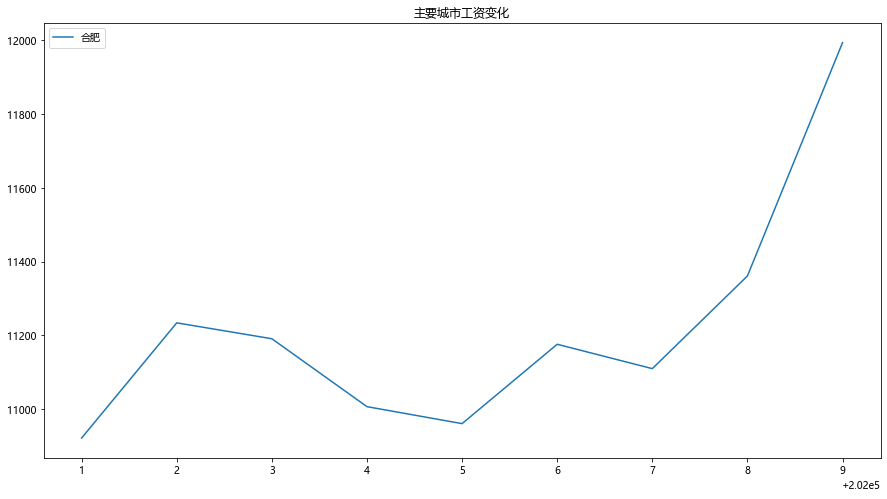

In [36]:
#plt.plot("Month","Salary",data=data_hangzhou, label='杭州')
#plt.plot("Month","Salary",data=history_data[history_data.City=='南京'], label='南京')
plt.figure(figsize=(15,8))
cities = set(history_data.city)
#cities = ['北京','上海','广州','深圳','杭州']
for city in cities:
    
    values=history_data[history_data.city==city]['salary'].values
    if abs(values[-1]-values[-2])>500:
        print(city)
        plt.plot("year_month","salary",data=history_data[history_data.city==city], label=city)
    
    #plt.show()
plt.title('主要城市工资变化')
plt.legend( loc='upper left')
plt.show()

In [37]:
values=history_data[history_data.city==city]['salary'].values

In [38]:
values

array([17296, 18609, 18937, 18846, 19143, 19006, 19333, 19239, 19346],
      dtype=int64)